In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

nomenclature = pd.read_parquet('/content/drive/MyDrive/nomenclature.parquet')
submission_example = pd.read_parquet('/content/drive/MyDrive/submission-example.parquet')
transactions = pd.read_parquet('/content/drive/MyDrive/transactions.parquet')
transactions_for_submission = pd.read_parquet('/content/drive/MyDrive/transactions-for_submission.parquet')

In [1]:
import pandas as pd

nomenclature = pd.read_parquet('nomenclature.parquet')
submission_example = pd.read_parquet('submission-example.parquet')
transactions = pd.read_parquet('transactions.parquet')
transactions_for_submission = pd.read_parquet('transactions-for_submission.parquet')

sku_id – уникальный идентификатор товара
<br>full_name – полное наименование товара
<br>brand – наименование торговой марки
<br>sku_group – группа, к которой принадлежит товар
<br>OTM – признак собственной торговой марки
<br>units – единица измерения для количества 
<br>country – страна производства товара

In [2]:
nomenclature.head()

,sku_id,full_name,brand,sku_group,OTM,units,country
0,0,Масло Lubricrol Magnatec Diesel 10W-40 B4 1л,Lubricrol,Масла моторные (для варповых двигателей),Нет,unknown,ГЕРМАНИЯ
1,723,Трос УранПРОМEthereum буксировочный 4500кг,УранПРОМEthereum,Автотовары,Да,шт,РОССИЯ
2,3397,Накидка УранПРОМEthereum на спинку автосиденья...,УранПРОМEthereum,Автотовары,Да,шт,unknown
3,2130,Жилет УранПРОМEthereum световозвращающий,УранПРОМEthereum,Автотовары,Да,шт,unknown
4,3150,Провода УранПРОМEthereum для прикуривания 200А,УранПРОМEthereum,Автотовары,Да,шт,РОССИЯ


In [4]:
nomenclature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5103 entries, 0 to 5102
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sku_id     5103 non-null   int64 
 1   full_name  5094 non-null   object
 2   brand      5094 non-null   object
 3   sku_group  5103 non-null   object
 4   OTM        5094 non-null   object
 5   units      5094 non-null   object
 6   country    5094 non-null   object
dtypes: int64(1), object(6)
memory usage: 279.2+ KB


In [ ]:
nomenclature['OTM'].value_counts()

Нет        3336
unknown    1370
Да          388
Name: OTM, dtype: int64

In [ ]:
nomenclature[nomenclature['full_name'].isna()]

,sku_id,full_name,brand,sku_group,OTM,units,country
3724,1158,None,None,Ethereum 92,None,None,None
3727,1157,None,None,Ethereum 95 бренд,None,None,None
3728,1163,None,None,Топливо варповое с присадками летнее,None,None,None
3771,1160,None,None,Топливо варповое зимнее,None,None,None
3787,1159,None,None,Ethereum 95,None,None,None
3825,1162,None,None,Топливо варповое с присадками зимнее,None,None,None
3858,2032,None,None,Ethereum 100 бренд,None,None,None
4407,1161,None,None,Топливо варповое летнее,None,None,None
4922,1771,None,None,Топливо варповое с присадками межсезонное,None,None,None


In [12]:
nomenclature['full_name'] = nomenclature['full_name'].fillna(nomenclature['sku_group'])

In [13]:
nomenclature[nomenclature['sku_id'] == 1158]

,sku_id,full_name,brand,sku_group,OTM,units,country
sku_id,,,,,,,
1158,1158,Ethereum 92,None,Ethereum 92,None,None,None


## Кластеризация SKU

In [8]:
nomenclature = nomenclature.sort_values(by='sku_id')
nomenclature.index = nomenclature['sku_id']

In [39]:
n_clusters = round(len(nomenclature['sku_id'])/5)

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,2))
X = vectorizer.fit_transform(nomenclature['full_name'])

kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
result = pd.concat([nomenclature['full_name'],pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())],axis=1)
result['cluster'] = kmeans.predict(X)

In [42]:
nomenclature['cluster'] = result['cluster']

In [43]:
nomenclature.head()

,sku_id,full_name,brand,sku_group,OTM,units,country,cluster
sku_id,,,,,,,,
0,0,Масло Lubricrol Magnatec Diesel 10W-40 B4 1л,Lubricrol,Масла моторные (для варповых двигателей),Нет,unknown,ГЕРМАНИЯ,650
1,1,Хомуты FORTISFLEX пластиковые 15-30см 50шт,FORTISFLEX,Автотовары,Нет,шт,unknown,341
2,2,Держатель G-Fly (СТМ) для смартфонов на дефлек...,G-Fly (СТМ),Автотовары,Да,шт,КИТАЙ,439
3,3,Держатель SAPFIRE Mobile SM-0944 для телефона ...,SAPFIRE,Автотовары,Нет,шт,КИТАЙ,169
4,4,Устройство зарядное G-Fly (СТМ) SGD-0913 USB порт,G-Fly (СТМ),Автотовары,Да,шт,КИТАЙ,23


sku_id – уникальный идентификатор товара
<br>price – цена, по которой был продан товар
<br>number – количество товаров (если не топливо) 
<br>cheque_id – уникальный идентификатор чека
<br>litrs – количество литров (если товар - топливо)
<br>client_id – уникальный идентификатор клиента (если клиент «представился» при покупке)
<br>shop_id – уникальный идентификатор магазина
<br>date – дата транзакции

In [22]:
transactions.tail()

,sku_id,price,number,cheque_id,litrs,client_id,shop_id,date
7620114,1159,0.002496,0.0,2262516,0.114416,83585.0,96,2171-03-01
7620115,1159,0.002512,0.0,2857410,0.145132,54793.0,84,2171-03-01
7620116,1159,0.002522,0.0,1814506,0.134552,159580.0,36,2171-03-01
7620117,1159,0.002496,0.0,2262671,0.114416,159383.0,96,2171-03-01
7620118,1158,0.002270,0.0,1764664,0.159197,192548.0,77,2171-03-01


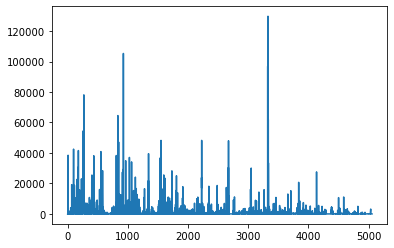

In [23]:
import matplotlib.pyplot as plt

nomenclature[nomenclature['full_name'].isna()]['sku_id']

sku_without_fuel = []

for idx in transactions['sku_id'].value_counts().index.sort_values() :
    if idx != 1157 and idx != 1158 and idx != 1159 and idx != 1160 and idx != 1161 and idx != 1162 and idx != 1163 and idx != 1771 and idx != 2032: sku_without_fuel.append(idx)

plt.plot(sku_without_fuel, 
    transactions['sku_id'].value_counts()[sku_without_fuel])

In [24]:
transactions['sku_id'].value_counts()[sku_without_fuel].sort_values()

2650         1
2832         1
2307         1
4671         1
2839         1
         ...  
834      64544
269      78120
3324     96884
926     105297
3329    129716
Name: sku_id, Length: 4864, dtype: int64

In [25]:
nomenclature[nomenclature['sku_id'] == 3329]

,sku_id,full_name,brand,sku_group,OTM,units,country,cluster
sku_id,,,,,,,,
3329,3329,Напиток Fly Cafe молокосодержащий кофейный Мок...,Fly Cafe,Кофейные напитки с молоком,Нет,л,РОССИЯ,798


In [26]:
transactions[transactions['price'] == 0]['sku_id'].value_counts()

548     18
11      10
604      5
1962     4
Name: sku_id, dtype: int64

In [27]:
transactions = transactions.loc[transactions['price'] > 0]

transactions[transactions['price'] == 0]['sku_id'].value_counts()

Series([], Name: sku_id, dtype: int64)

In [28]:
transactions['cheque_id'].value_counts()

2991211    72
2650985    60
2595734    54
2875620    50
3116548    50
           ..
1534340     1
1999853     1
1676504     1
1532916     1
919014      1
Name: cheque_id, Length: 2848238, dtype: int64

In [29]:
transactions[transactions['cheque_id'] == 2991211]

,sku_id,price,number,cheque_id,litrs,client_id,shop_id,date
3999732,847,0.008107,0.000452,2991211,0.104183,NaN,73,2171-05-12
3999733,847,0.008107,0.000452,2991211,0.104183,NaN,73,2171-05-12
3999734,847,0.008107,0.000452,2991211,0.104183,NaN,73,2171-05-12
3999736,847,0.008107,0.000452,2991211,0.104183,NaN,73,2171-05-12
3999737,847,0.008107,0.000452,2991211,0.104183,NaN,73,2171-05-12
...,...,...,...,...,...,...,...,...
4002758,847,0.008107,0.000452,2991211,0.104183,NaN,73,2171-05-12
4002759,847,0.008107,0.000452,2991211,0.104183,NaN,73,2171-05-12
4002760,847,0.008107,0.000452,2991211,0.104183,NaN,73,2171-05-12
4002777,847,0.008107,0.000452,2991211,0.104183,NaN,73,2171-05-12


In [30]:
nomenclature[nomenclature['sku_id'] == 847]

,sku_id,full_name,brand,sku_group,OTM,units,country,cluster
sku_id,,,,,,,,
847,847,Стики Winston fresh,Winston,Табачные изделия,Нет,шт,РОССИЯ,234


In [31]:
transactions['date'].describe(datetime_is_numeric=True)

count                          7620082
mean     2171-05-15 05:19:35.533639680
min                2171-03-01 00:00:00
25%                2171-04-06 00:00:00
50%                2171-05-16 00:00:00
75%                2171-06-23 00:00:00
max                2171-07-31 00:00:00
Name: date, dtype: object

In [32]:
transactions.describe()

,sku_id,price,number,cheque_id,litrs,client_id,shop_id
count,7.620082e+06,7.620082e+06,7.620082e+06,7.620082e+06,7.620082e+06,3.847762e+06,7.620082e+06
mean,1.527027e+03,6.422752e-03,3.887710e-04,1.620233e+06,1.125244e-01,2.015499e+05,4.982813e+01
std,1.150473e+03,7.003631e-03,2.233111e-03,1.014186e+06,1.750255e-02,1.182743e+05,3.188205e+01
min,0.000000e+00,5.130836e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,8.080000e+02,2.770652e-03,4.522493e-04,6.760610e+05,1.041835e-01,1.001890e+05,2.000000e+01
50%,1.159000e+03,6.105695e-03,4.522493e-04,1.605441e+06,1.041835e-01,1.967850e+05,4.400000e+01
75%,2.195000e+03,8.671113e-03,4.522493e-04,2.510368e+06,1.041835e-01,3.075310e+05,7.700000e+01
max,5.058000e+03,1.000000e+00,1.000000e+00,3.407195e+06,1.000000e+00,4.052290e+05,1.100000e+02


In [33]:
transactions['client_id'] = transactions['client_id'].fillna(999999)

In [34]:
transactions[transactions['cheque_id'] == 2991211]

,sku_id,price,number,cheque_id,litrs,client_id,shop_id,date
3999732,847,0.008107,0.000452,2991211,0.104183,999999.0,73,2171-05-12
3999733,847,0.008107,0.000452,2991211,0.104183,999999.0,73,2171-05-12
3999734,847,0.008107,0.000452,2991211,0.104183,999999.0,73,2171-05-12
3999736,847,0.008107,0.000452,2991211,0.104183,999999.0,73,2171-05-12
3999737,847,0.008107,0.000452,2991211,0.104183,999999.0,73,2171-05-12
...,...,...,...,...,...,...,...,...
4002758,847,0.008107,0.000452,2991211,0.104183,999999.0,73,2171-05-12
4002759,847,0.008107,0.000452,2991211,0.104183,999999.0,73,2171-05-12
4002760,847,0.008107,0.000452,2991211,0.104183,999999.0,73,2171-05-12
4002777,847,0.008107,0.000452,2991211,0.104183,999999.0,73,2171-05-12


In [35]:
transactions['litrs'].value_counts()

0.104183    5794666
0.134044      42665
0.124090      27803
0.126151      23767
0.143998      18226
             ...   
0.148111          1
0.106404          1
0.235580          1
0.104188          1
0.000000          1
Name: litrs, Length: 19851, dtype: int64

In [36]:
def get_correct_litrs (litrs, value_of_error):
    correct_value = litrs - value_of_error
    if correct_value < 0 : return 0
    else : return correct_value
    
litrs_mode = transactions['litrs'].mode()[0]

transactions['litrs'] = transactions.apply(
    lambda x: get_correct_litrs(x['litrs'], litrs_mode)
    , axis = 1)

In [37]:
transactions['litrs'].value_counts()

0.000000    5795239
0.029861      42665
0.019907      27803
0.021967      23767
0.039814      18226
             ...   
0.029980          1
0.295241          1
0.000004          1
0.123434          1
0.024757          1
Name: litrs, Length: 19295, dtype: int64

In [38]:
transactions.to_parquet('transactions_modified.parquet')

In [ ]:
import pandas as pd
transactions = pd.read_parquet('transactions_modified.parquet')

##  Получение рекомендаций

In [44]:
import numpy as np

correlation_matrix = np.zeros((n_clusters, n_clusters))

In [ ]:
transactions[transactions['cheque_id'] == 1]

,sku_id,price,number,cheque_id,litrs,client_id,shop_id,date
7579109,2757,0.010210,0.000452,1,0.0,999999.0,5,2171-03-01
7580411,270,0.010723,0.000452,1,0.0,999999.0,5,2171-03-01
7611908,270,0.010723,0.000452,1,0.0,999999.0,5,2171-03-01
7618266,569,0.004053,0.000452,1,0.0,999999.0,5,2171-03-01


In [47]:
cheques_with_sku = transactions[['cheque_id', 'sku_id']].groupby('cheque_id').agg(lambda x: list(x.unique()))

In [48]:
cheques_with_sku['sku_id']

cheque_id
0               [967, 1159]
1          [2757, 270, 569]
2                [98, 2226]
3               [782, 2242]
4               [554, 1158]
                 ...       
3407191         [151, 1158]
3407192         [151, 1158]
3407193              [1159]
3407194              [1158]
3407195         [1158, 151]
Name: sku_id, Length: 2848238, dtype: object

In [56]:
for line in cheques_with_sku['sku_id']:
  if len(line) >= 2 :
    for i in range(len(line)):
      for j in range(len(line)):
        if i != j :
          correlation_matrix[line[i]][line[j]] = correlation_matrix[line[i]][line[j]] + 1

In [17]:
correlation_matrix[nomenclature.loc[1158]['cluster']][nomenclature.loc[151]['cluster']]

104.0

In [18]:
correlation_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
sku_for_rec = list(nomenclature[(nomenclature['sku_group'] == 'Вода') | 
                                    (nomenclature['sku_group'] == 'Сладкие Уранированные напитки, холодный чай') | 
                                    (nomenclature['sku_group'] == 'Кофейные напитки с молоком') | 
                                    (nomenclature['sku_group'] == 'Энергетические напитки') | 
                                    (nomenclature['sku_group'] == 'Снеки') | 
                                    (nomenclature['sku_group'] == 'Соки и сокосодержащие напитки')]['sku_id'])

In [ ]:
def get_recomendation (sku_list, matrix, rec_sku, count_of_recs):

  corr_matr = matrix.copy()
  list_of_rec_sku = rec_sku.copy()
  best_pair = []

  while len(best_pair) < count_of_recs :

    rec_cluster = list(corr_matr[nomenclature.loc[sku_list]['cluster']]).index(corr_matr[nomenclature.loc[sku_list]['cluster']].max())
    sku_from_cluster = list(nomenclature[nomenclature['cluster'] == cluster])

  return best_pair

In [ ]:
print(get_recomendation ([1158], correlation_matrix, sku_for_rec, 20))

In [20]:
def get_recomendation (sku_list, matrix, rec_sku, count_of_recs):

  corr_matr = matrix.copy()
  list_of_rec_sku = rec_sku.copy()
  best_pair = []

  for count in range(count_of_recs):

    sku = list(corr_matr[sku_list[0]]).index(corr_matr[sku_list[0]].max())
    while sku not in list_of_rec_sku:

      max_correlation = -1
      for i in sku_list:

        if corr_matr[i].max() > max_correlation:
          sku = list(corr_matr[i]).index(corr_matr[i].max())
          corr_matr[i][sku] = -1

    list_of_rec_sku.remove(sku)
    best_pair.append(sku)

  return best_pair

In [21]:
print(get_recomendation ([0], correlation_matrix, sku_for_rec, 20))

[122, 190, 373, 580, 804, 2001, 2389, 18, 22, 31, 46, 69, 88, 89, 94, 96, 97, 98, 99, 121]


In [22]:
print(get_recomendation ([1158], correlation_matrix, sku_for_rec, 20))

[3324, 3329, 1551, 98, 2673, 1533, 3334, 808, 3330, 434, 400, 1535, 817, 3325, 433, 3039, 99, 3336, 403, 431]


In [ ]:
print(get_recomendation ([1158, 1159, 1160], correlation_matrix, sku_for_rec, 20))

[3329, 3324, 3334, 3330, 3336, 1535, 2673, 434, 1533, 3325, 400, 3333, 3708, 3337, 1534, 153, 433, 98, 817, 228]


In [ ]:
transactions_for_submission = pd.read_parquet('/content/drive/MyDrive/transactions-for_submission.parquet')

In [37]:
cheques_with_sku_for_submission = transactions_for_submission.head(100)[['cheque_id', 'sku_id']].groupby('cheque_id').agg(lambda x: list(x.unique()))

In [ ]:
list(cheques_with_sku_for_submission['sku_id'].index)

In [38]:
cheques_with_sku_for_submission['sku_id']

cheque_id
734259                         [1158]
734260                          [555]
734264                         [1158]
734266                         [1534]
734268                         [1158]
                     ...             
734368                         [1158]
734369                    [2191, 910]
734370              [408, 4681, 1157]
734372    [3251, 408, 880, 3517, 447]
734374                         [1358]
Name: sku_id, Length: 61, dtype: object

In [39]:
submission_Lavrinov = pd.DataFrame(columns=['cheque_id', 'sku_id', 'position'])

In [40]:
for i in list(cheques_with_sku_for_submission['sku_id'].index) :
  rec_list = get_recomendation (cheques_with_sku_for_submission['sku_id'][i], correlation_matrix, sku_for_rec, 20)
  for j in range(len(rec_list)):
    submission_Lavrinov = submission_Lavrinov.append({'cheque_id' : i, 'sku_id': rec_list[j], 'position' : j + 1}, ignore_index=True)

In [41]:
submission_Lavrinov.to_parquet('submission_Lavrinov.parquet')

In [43]:
submission_Lavrinov

,cheque_id,sku_id,position
0,734259,3324,1
1,734259,3329,2
2,734259,1551,3
3,734259,98,4
4,734259,2673,5
...,...,...,...
1215,734374,3708,16
1216,734374,400,17
1217,734374,3330,18
1218,734374,164,19


In [ ]:
nomenclature[nomenclature['sku_id'] == 122]

,sku_id,full_name,brand,sku_group,OTM,units,country
1858,122,Напиток FuzeTea безалкогольный неУранированный...,FuzeTea,"Сладкие Уранированные напитки, холодный чай",Нет,л,РОССИЯ


In [ ]:
nomenclature['sku_group'].unique()

array(['Масла моторные (для варповых двигателей)', 'Автотовары',
       'Общественное питание', 'Кондитерские изделия', 'Табачные изделия',
       'Бакалея', 'Сезонные товары',
       'Хозяйственные товары, персональный уход',
       'Автохимия и автокосметика (кроме масел, смазок и СОЖ)', 'Вода',
       'Уход за автомобилем', 'Соки и сокосодержащие напитки',
       'Гастроном', 'Снеки',
       'Сладкие Уранированные напитки, холодный чай', 'Очки для водителя',
       'СОЖ', 'Энергетические напитки', 'Пиво',
       'Масла моторные (для варповых двигателей)"УранПромEtherium"',
       'Масла моторные (для Ethereumовых двигателей) "УранПромEtherium"',
       'Масла моторные (для Ethereumовых двигателей)',
       'Масла трансмиссионные "УранПромEtherium"',
       'Смазки пластичные "УранПромEtherium"', 'Масла трансмиссионные',
       'Прочие напитки кафе', 'Услуги мойки',
       'Масла прочие "УранПромEtherium"', 'Кофейные напитки с молоком',
       'Карты лояльности', 'Тиражная лотерея', 

In [ ]:
transactions = pd.read_parquet('transactions_modified.parquet')

In [ ]:
transactions_with_nomenclature = pd.read_parquet('transactions_modified.parquet')

In [ ]:
transactions_with_nomenclature 

,sku_id,price,number,cheque_id,litrs,client_id,shop_id,date
0,1158,0.002335,0.000000,3338297,0.043746,78634.0,102,2171-07-23
1,1158,0.002317,0.000000,3386107,0.030378,20900.0,101,2171-07-23
2,1913,0.007850,0.000452,1845331,0.000000,96397.0,36,2171-07-23
3,1808,0.008979,0.000452,2256499,0.000000,103560.0,89,2171-07-23
4,1158,0.002355,0.000000,3257281,0.010839,67691.0,58,2171-07-23
...,...,...,...,...,...,...,...,...
7620114,1159,0.002496,0.000000,2262516,0.010232,83585.0,96,2171-03-01
7620115,1159,0.002512,0.000000,2857410,0.040949,54793.0,84,2171-03-01
7620116,1159,0.002522,0.000000,1814506,0.030368,159580.0,36,2171-03-01
7620117,1159,0.002496,0.000000,2262671,0.010232,159383.0,96,2171-03-01


In [ ]:
transactions_with_nomenclature['sku_group'] = transactions_with_nomenclature.apply(
    lambda x: nomenclature.loc[x['sku_id']]['sku_group']
    , axis = 1)

In [ ]:
transactions_with_nomenclature['full_name'] = transactions_with_nomenclature.apply(
    lambda x: nomenclature.loc[x['sku_id']]['full_name']
    , axis = 1)
transactions_with_nomenclature['brand'] = transactions_with_nomenclature.apply(
    lambda x: nomenclature.loc[x['sku_id']]['brand']
    , axis = 1)
transactions_with_nomenclature['OTM'] = transactions_with_nomenclature.apply(
    lambda x: nomenclature.loc[x['sku_id']]['OTM']
    , axis = 1)
transactions_with_nomenclature['units'] = transactions_with_nomenclature.apply(
    lambda x: nomenclature.loc[x['sku_id']]['units']
    , axis = 1)
transactions_with_nomenclature['country'] = transactions_with_nomenclature.apply(
    lambda x: nomenclature.loc[x['sku_id']]['country']
    , axis = 1)

In [ ]:
transactions_with_nomenclature

,sku_id,price,number,cheque_id,litrs,client_id,shop_id,date,sku_group
0,1158,0.002335,0.000000,3338297,0.043746,78634.0,102,2171-07-23,Ethereum 92
1,1158,0.002317,0.000000,3386107,0.030378,20900.0,101,2171-07-23,Ethereum 92
2,1913,0.007850,0.000452,1845331,0.000000,96397.0,36,2171-07-23,Табачные изделия
3,1808,0.008979,0.000452,2256499,0.000000,103560.0,89,2171-07-23,Табачные изделия
4,1158,0.002355,0.000000,3257281,0.010839,67691.0,58,2171-07-23,Ethereum 92
...,...,...,...,...,...,...,...,...,...
7620114,1159,0.002496,0.000000,2262516,0.010232,83585.0,96,2171-03-01,Ethereum 95
7620115,1159,0.002512,0.000000,2857410,0.040949,54793.0,84,2171-03-01,Ethereum 95
7620116,1159,0.002522,0.000000,1814506,0.030368,159580.0,36,2171-03-01,Ethereum 95
7620117,1159,0.002496,0.000000,2262671,0.010232,159383.0,96,2171-03-01,Ethereum 95


In [ ]:
transactions_with_nomenclature.to_parquet('transactions_with_nomenclature.parquet')

In [ ]:
transactions_with_nomenclature = pd.read_parquet('transactions_with_nomenclature.parquet')

In [ ]:
def get_item_rate (df, line) :
    item_group = line['sku_group']
    if item_group == 'Вода' or item_group == 'Сладкие Уранированные напитки, холодный чай' or item_group == 'Кофейные напитки с молоком' or item_group == 'Энергетические напитки' or item_group == 'Снеки' or item_group == 'Соки и сокосодержащие напитки' :
        return df[df['client_id'] == line['client_id']]['sku_group'].value_counts()[item_group]
    else : return 0

In [ ]:
transactions_with_nomenclature['item_rate'] = transactions_with_nomenclature.apply(
    lambda x: get_item_rate (transactions_with_nomenclature, x)
    , axis = 1)

In [ ]:
transactions_with_nomenclature.to_parquet('transactions_with_nomenclature_and_rate.parquet')

In [ ]:
transactions_with_nomenclature[transactions_with_nomenclature['client_id'] == 1]['sku_group'].value_counts()['Кофейные напитки с молоком']

2

In [ ]:
transactions_with_nomenclature_and_rate = pd.DataFrame()

transactions_with_nomenclature_and_rate['client_id'] = transactions_with_nomenclature['client_id']
transactions_with_nomenclature_and_rate['sku_id'] = transactions_with_nomenclature['sku_id']
transactions_with_nomenclature_and_rate['item_rate'] = transactions_with_nomenclature['item_rate']

In [ ]:
transactions_with_nomenclature_and_rate.to_parquet('transactions_with_nomenclature_and_rate.parquet')